In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../model_json/make_json_program/cnn')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_vgg16
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 32

In [3]:
make_vgg16.make_json()

In [4]:
json_file = open('../model_json/json/vgg16.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn'},
 'layer1': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn'},
 'layer2': {'input_features': 4096,
  'out_features': 4096,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer3': {'input_features': 4096,
  'out_features': 1000,
  'layer_type': 'output',
  'processing_type': 'linear'},
 'layer4': {'input_channels': 128,
  'out_channels': 256,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn'},
 'layer5': {'input_channels': 256,
  'out_channels': 256,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn'},
 'layer6': {'input_channels': 256,
  'out_channels': 256,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn'},
 'layer7': {'input_channels': 256,
  'out_channels': 512,
  'kernel_size': 3,
  'layer_type': 'hidden',
 

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
        
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
    
    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

array([ 576.,  576.,  576., ..., 4608., 4608., 4608.])

(array([  68608.,    4096.,       0.,       0.,  655360.,       0.,
              0.,       0.,    4096., 2883584.]),
 array([ 576. ,  979.2, 1382.4, 1785.6, 2188.8, 2592. , 2995.2, 3398.4,
        3801.6, 4204.8, 4608. ]),
 <a list of 10 Patch objects>)

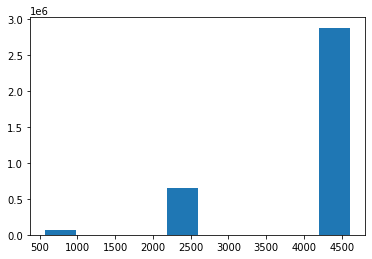

In [6]:
plt.hist(branch_list)